## Importação de Bibliotecas

In [1]:
# Bibliotecas gerais e de visualização de dados 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Bibliotecas de machine-learning
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor 
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, make_scorer
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance

## Importação de Arquivos

Neste projeto, a seguinte divisão será usada:
- **20% dos dados** irão compor o conjunto de **teste**;
- **80% dos dados** irão compor o conjunto de **treino**.

In [3]:
try:
    df = pd.read_csv('insurance.csv')
    print('O arquivo foi importado.')
except FileNotFoundError:
    print('O arquivo não foi localizado.')
except TypeError:
    print('O nome do arquivo não foi informado.')
except Exception as e:
    print('A importação do arquivo gerou um erro:', e)

O arquivo foi importado.


In [6]:
df_train, df_test = train_test_split(df, test_size = 0.20, random_state = 42)

In [7]:
df_train.to_csv('insurance_train.csv', index = False)

In [8]:
df_test.to_csv('insurance_test.csv', index = False)

In [9]:
df = pd.read_csv('insurance_train.csv')

## Informações gerais

Com o objetivo de evitar ao máximo possíveis enviesamentos e *data leakage*, apenas uma amostra dos dados será utilizada para visualização de informações gerais:

In [10]:
df.shape

(1070, 7)

In [11]:
df_sample = df.sample(200, random_state = 42)

In [12]:
df_sample.head()

,age,sex,bmi,children,smoker,region,charges
644,49,male,30.900,0,yes,southwest,39727.61400
629,38,female,40.150,0,no,southeast,5400.98050
70,47,male,36.080,1,yes,southeast,42211.13820
962,63,male,31.445,0,no,northeast,13974.45555
787,23,male,23.845,0,no,northeast,2395.17155


In [13]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 644 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    object 
 2   bmi       200 non-null    float64
 3   children  200 non-null    int64  
 4   smoker    200 non-null    object 
 5   region    200 non-null    object 
 6   charges   200 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 12.5+ KB


## Checagem de Dados Nulos

In [14]:
df_sample.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Análise Estatística

### Nível de Correlação entre as Colunas Numéricas

In [15]:
df_corr = df_sample.corr().drop(columns = 'charges')

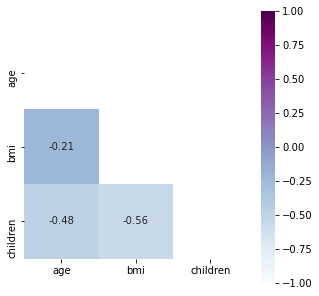

In [16]:
mask = np.zeros_like(df_corr.corr())
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.heatmap(df_corr.corr(), mask = mask, annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'BuPu', square = True)

Os níveis de correlação entre as colunas numéricas são bastante baixos.

### Contagem de Classes

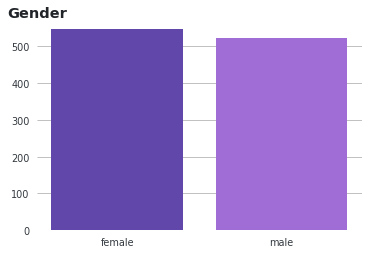

In [17]:
fig, ax = plt.subplots()
ax.bar(df['sex'].unique(), df['sex'].value_counts(), color = ['#6247AA', '#A06CD5'])
ax.set_axisbelow(True)
ax.grid(True, axis = 'y')

for location in ['top', 'bottom', 'left', 'right']:
    ax.spines[location].set_visible(False)
    
plt.xticks(fontsize = 10, color = '#343A40')
plt.yticks(fontsize = 10, color = '#343A40')
ax.tick_params(color = 'white')

plt.text(-0.67, 580, 'Gender', color = '#212529', fontdict = {'weight':'bold'}, size = 15)

plt.gcf().set_dpi(70)
plt.show()

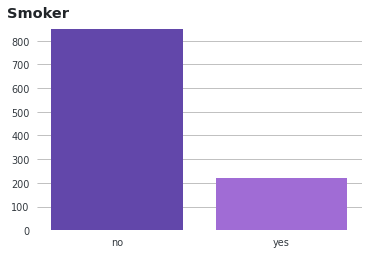

In [18]:
fig, ax = plt.subplots()
ax.bar(df['smoker'].unique(), df['smoker'].value_counts(), color = ['#6247AA', '#A06CD5'])
ax.set_axisbelow(True)
ax.grid(True, axis = 'y')

for location in ['top', 'bottom', 'left', 'right']:
    ax.spines[location].set_visible(False)
    
plt.xticks(fontsize = 10, color = '#343A40')
plt.yticks(fontsize = 10, color = '#343A40')
ax.tick_params(color = 'white')

plt.text(-0.67, 900, 'Smoker', color = '#212529', fontdict = {'weight':'bold'}, size = 15)

plt.gcf().set_dpi(70)
plt.show()

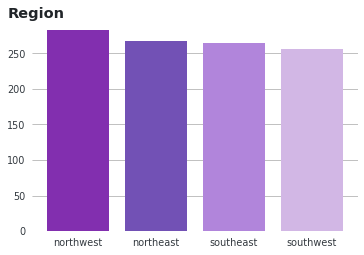

In [19]:
fig, ax = plt.subplots()
ax.bar(df['region'].unique(), df['region'].value_counts(), color = ['#822FAF', '#7251B5', '#B185DB', '#D2B7E5'])
ax.set_axisbelow(True)
ax.grid(True, axis = 'y')

for location in ['top', 'bottom', 'left', 'right']:
    ax.spines[location].set_visible(False)
    
plt.xticks(fontsize = 10, color = '#343A40')
plt.yticks(fontsize = 10, color = '#343A40')
ax.tick_params(color = 'white')

plt.text(-0.9, 300, 'Region', color = '#212529', fontdict = {'weight':'bold'}, size = 15)

plt.gcf().set_dpi(70)
plt.show()

Com exceção da variável `smoker`, percebe-se que a amostra é uniformemente distribuída em relação ao gênero e à localização de cada cliente. Temos um número maior de clientes auto declarados não-fumantes do que fumantes.

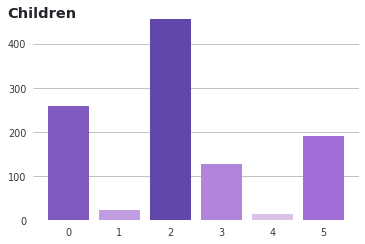

In [20]:
fig, ax = plt.subplots()
ax.bar(df['children'].unique(), df['children'].value_counts(), color = ['#6247AA', '#815AC0', '#A06CD5', '#B185DB', '#C19EE0', '#DAC3E8'])
ax.set_axisbelow(True)
ax.grid(True, axis = 'y')

for location in ['top', 'bottom', 'left', 'right']:
    ax.spines[location].set_visible(False)
    
plt.xticks(fontsize = 10, color = '#343A40')
plt.yticks(fontsize = 10, color = '#343A40')
ax.tick_params(color = 'white')

plt.text(-1.2, 460, 'Children', color = '#212529', fontdict = {'weight':'bold'}, size = 15)

plt.gcf().set_dpi(70)
plt.show()

No que se refere ao número de filhos, a maior parte dos clientes contidos na amostra declararam ter 2 filhos.

### Distribuições para as colunas numéricas

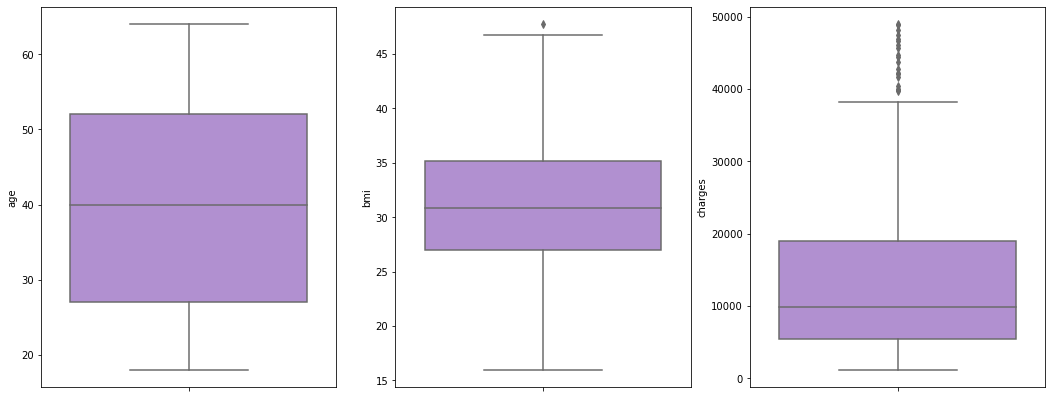

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18,7))
index = 0
axes = axes.flatten()

for col in ['age', 'bmi','charges']:
    sns.boxplot(y = col, data = df_sample, color = '#B185DB', ax = axes[index])
    index += 1

Para as variáveis que identificam a idade e o índice de massa corporal dos clientes, percebe-se uma distribuição uniforme de valores, sem a presença de outliers significativos. Já para `charges`, coluna que contém os valores dos encargos do plano de saúde, percebe-se a presença de alguns valores acima do valor máximo identificado para a amostra.

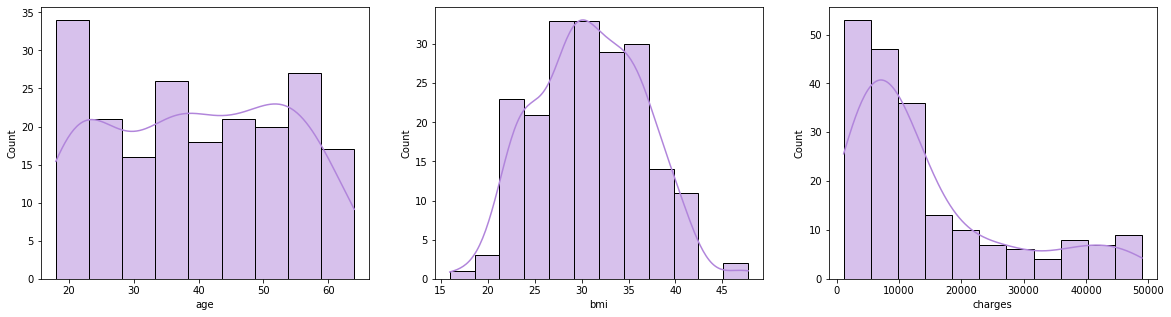

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))
index = 0
axes = axes.flatten()

for col in ['age', 'bmi','charges']:
    sns.histplot(data = df_sample, x = col, kde = True, color = '#B185DB', ax = axes[index])
    index += 1

Para a variável idade, foi possível perceber uma distribuição mais uniforme não sendo a média, por exemplo, representativa do todo. Já para o índice de massa corporal, é possível observar uma distribuição normal dos dados, com medidas de posição como média, moda e mediana, apontando para valores bastante semelhantes entre si. 

Para os encargos cobrados pelo de plano de saúde, percebe-que uma distribuição bastante concentrada em valores abaixo de 15 mil dólares. Isto pode se refletir nos modelos que serão implementados adiante, uma vez que demonstra que a base de dados possui informação suficiente para prever casos em que o valor do plano de saúde está abaixo do valor mencionado, porém, possui dficuldades na estimativa de valores para casos incomuns. Para esta variável, pode ser interessante manter algumas métricas visíveis:

In [23]:
df_sample['charges'].describe()

count      200.000000
mean     14355.008731
std      12857.583009
min       1136.399400
25%       5429.306950
50%       9814.489300
75%      19002.559258
max      48970.247600
Name: charges, dtype: float64

Algo interessante de se fazer é olhar de forma separada para os perfis dos clientes cujos encargos estão abaixo e acima de 15 mil dólares:

In [26]:
df_sample_under15 = df_sample.loc[df_sample['charges'] <= 15000, :]
df_sample_over15 = df_sample.loc[df_sample['charges'] > 15000, :]

**Usuários que pagam <font color='blue'>abaixo</font> de 15 mil dólares anualmente:**

In [27]:
df_sample_under15.describe()

,age,bmi,children,charges
count,141.000000,141.000000,141.000000,141.000000
mean,38.893617,30.423014,0.985816,7244.793019
std,13.446031,5.624159,1.108318,3800.550118
min,18.000000,15.960000,0.000000,1136.399400
25%,26.000000,26.600000,0.000000,4320.410850
50%,38.000000,30.020000,1.000000,6985.506950
75%,51.000000,34.200000,2.000000,10436.096000
max,64.000000,47.740000,5.000000,14711.743800


In [31]:
for col in ['sex','smoker','region']:
    print(f'Feature: {col}')
    print(df_sample_under15[col].value_counts(normalize = True)) 
    print('')

Feature: sex
female    0.531915
male      0.468085
Name: sex, dtype: float64

Feature: smoker
no     0.978723
yes    0.021277
Name: smoker, dtype: float64

Feature: region
northeast    0.283688
northwest    0.255319
southeast    0.241135
southwest    0.219858
Name: region, dtype: float64



**Usuários que pagam <font color='red'>acima</font> de 15 mil dólares anualmente:**

In [32]:
df_sample_over15.describe()

,age,bmi,children,charges
count,59.000000,59.000000,59.000000,59.000000
mean,41.966102,32.033559,1.288136,31347.219160
std,14.326207,5.634981,1.260143,10757.779096
min,19.000000,20.045000,0.000000,15170.069000
25%,29.000000,27.955000,0.000000,20253.537445
50%,44.000000,32.780000,1.000000,29186.482360
75%,53.500000,35.995000,2.000000,41047.550100
max,64.000000,41.895000,4.000000,48970.247600


In [33]:
for col in ['sex','smoker','region']:
    print(f'Feature: {col}')
    print(df_sample_over15[col].value_counts(normalize = True)) 
    print('')

Feature: sex
male      0.576271
female    0.423729
Name: sex, dtype: float64

Feature: smoker
yes    0.627119
no     0.372881
Name: smoker, dtype: float64

Feature: region
southeast    0.372881
northwest    0.254237
northeast    0.237288
southwest    0.135593
Name: region, dtype: float64



No que se refere às variáveis categóricas (gênero, ser ou não fumante e região onde vive), não foram encontradas muitas diferenças na forma como se distribuem entre os clientes que pagam abaixo e acima de 15 mil dólares.

Porém, em relação às *features* numéricas foi possível observar que os clientes com encargos acima de 15 mil dólares costumam ser um pouco mais velhos, com idade em torno de 44 anos, frente a idade de 38 anos, apresentada em média pelo grupo cujos encargos são menores.

O índice de massa corporal também é levemente maior: 32 para os clientes que pagam mais caro e 30 para aqueles com menores custos, entre obesidade grau I e sobrepeso, respectivamente. O número de dependentes, fator que costuma ter muito impacto nos custos, fica entre 0 e 1 para o grupo abaixo de 15 mil dólares e 1 e 2, para aqueles clientes que costumam pagar mais.

## Implementação de Modelos

Utilizaremos diferentes técnicas para previsão dos encargos do plano de saúde a partir das variáveis fornecidas pelos clientes. A técnica de **hold-out** será implementada, e os melhores modelos serão selecionados a partir das métricas do conjunto de validação. 

As métricas a serem avaliadas em cada modelo serão a **raiz do erro quadrático médio (RMSE)**, o **erro percentual absoluto médio (MAPE)** e o **coeficiente de correlação (R²)**.

In [24]:
X = df.drop(columns = 'charges')
y = df['charges']

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, shuffle = True, random_state = 42)

❗ Na etapa de visualização dos dados, foi possível notar a presença de variáveis categóricas, que devem ser pré-processadas antes de sua implementação no modelo. Para isto, aplicaremos a técnica de **one-hot enconding**, criando colunas para as múltiplas *labels* presentes em cada coluna categórica. 

### Regressão Linear

In [26]:
pipeline_linear = Pipeline([('one_hot', OneHotEncoder(handle_unknown = 'ignore')),
                            ('model', LinearRegression())])

In [27]:
pipeline_linear.fit(X_train, y_train)

Pipeline(steps=[('one_hot', OneHotEncoder(handle_unknown='ignore')),
                ('model', LinearRegression())])

In [28]:
y_pred_linear = pipeline_linear.predict(X_val)
rmse_linear = mean_squared_error(y_val, y_pred_linear, squared = False)
mape_linear = mean_absolute_percentage_error(y_val, y_pred_linear)
r2_linear = r2_score(y_val, y_pred_linear)

In [29]:
print(f'RMSE:{rmse_linear}')
print(f'MAPE:{mape_linear}')
print(f'R²:{r2_linear}')

RMSE:7387.2093678861165
MAPE:0.6510921135094458
R²:0.657957134909681


### Regressão Linear com Padronização dos Dados

Aplicaremos uma regressão linear nos dados, porém executando uma normalização para as colunas numéricas em que a média será igual a zero e o desvio padrão igual a 1. A classe `StandardScaler` será utilizada para isso.

In [30]:
numerical_features = ['age','bmi']
numerical_transformer = StandardScaler()

categorical_features = ['sex','smoker','region']
categorical_transformer = OneHotEncoder(sparse = True, handle_unknown = 'ignore')

preprocessor = ColumnTransformer(transformers = [('numerical', numerical_transformer, numerical_features),
                                                 ('categorical', categorical_transformer, categorical_features)])

In [31]:
pipeline_linear_scaled = Pipeline([('preprocessor', preprocessor),
                                   ('model', LinearRegression())])

In [32]:
pipeline_linear_scaled.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['age', 'bmi']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', LinearRegression())])

In [33]:
y_pred_linear_scaled = pipeline_linear_scaled.predict(X_val)
rmse_linear_scaled = mean_squared_error(y_val, y_pred_linear_scaled, squared = False)
mape_linear_scaled = mean_absolute_percentage_error(y_val, y_pred_linear_scaled)
r2_linear_scaled = r2_score(y_val, y_pred_linear_scaled)

In [34]:
print(f'RMSE:{rmse_linear_scaled}')
print(f'MAPE:{mape_linear_scaled}')
print(f'R²:{r2_linear_scaled}')

RMSE:6639.930290384161
MAPE:0.4130783248643915
R²:0.7236580870827753


A padronização dos dados durante a implementação da regressão linear teve um efeito positivo sobre as métricas do modelo. Esta normalização pode ter gerado uma facilidade de entendimento para o algoritmo, que teve que lidar apenas com pontos reduzidos a um intervalo conhecido.

### Regressão Linear com Lasso

Aplicaremos uma regressão linear Lasso aos dados, que visa reduzir a dependência das predições geradas em relação às *features* introduzindo para isto um *bias* ($\alpha$) à equação de regressão. Quanto maior o valor desta nova parcela, mais os coeficientes para cada variável se tornam mais próximos de zero. 

In [35]:
alpha = [1, 10, 100, 1000]
rmse_list = []
mape_list = []
r2_list = []

for l in alpha:
    
    pipeline_linear_lasso = Pipeline([('preprocessor', preprocessor),
                                      ('model', Lasso(alpha = l))]) 
    
    pipeline_linear_lasso.fit(X_train, y_train)
    
    y_pred_linear_lasso = pipeline_linear_lasso.predict(X_val)
    rmse_linear_lasso = mean_squared_error(y_val, y_pred_linear_lasso, squared = False)
    mape_linear_lasso = mean_absolute_percentage_error(y_val, y_pred_linear_lasso)
    r2_linear_lasso = r2_score(y_val, y_pred_linear_lasso)
    
    rmse_list.append(rmse_linear_lasso)
    mape_list.append(mape_linear_lasso)    
    r2_list.append(r2_linear_lasso)
    
dict_results = {'alpha': alpha,
                'RMSE': rmse_list,
                'MAPE': mape_list,
                'R²': r2_list}

display(pd.DataFrame(dict_results))

,alpha,RMSE,MAPE,R²
0,1,6639.930696,0.413055,0.723658
1,10,6640.159402,0.412846,0.723639
2,100,6662.417157,0.417869,0.721783
3,1000,7385.270326,0.620771,0.658137


A inserção de menor dependência em relação às *features* não teve um efeito muito positivo sobre as métricas do modelo. A melhor configuração foi justamente aquela que não permitiu uma redução tão extrema dos coeficientes de cada variável, com $\alpha$ igual a 1.

### Árvore de Decisão

Para o modelo de árvore decisão serão testados diferentes configurações de profundidade para o estimador, variando entre 1 e 40.

In [36]:
depths = [i for i in range(5,41,5)]
depths = [1,3] + depths
rmse_list = []
mape_list = []
r2_list = []

for depth in depths:
    
    pipeline_tree = Pipeline([('one_hot', OneHotEncoder(sparse = True, handle_unknown = 'ignore')),
                              ('model', DecisionTreeRegressor(max_depth = depth, random_state = 42))])
    
    pipeline_tree.fit(X_train, y_train)
    
    y_pred_tree = pipeline_tree.predict(X_val)
    rmse_tree = mean_squared_error(y_val, y_pred_tree, squared = False)
    mape_tree = mean_absolute_percentage_error(y_val, y_pred_tree)
    r2_tree = r2_score(y_val, y_pred_tree)
    
    rmse_list.append(rmse_tree)
    mape_list.append(mape_tree)
    r2_list.append(r2_tree)
    
dict_results = {'depths': depths,
                'RMSE': rmse_list,
                'MAPE': mape_list,
                'R²': r2_list}

display(pd.DataFrame(dict_results)) 

,depths,RMSE,MAPE,R²
0,1,8030.821962,0.819011,0.595760
1,3,7956.901765,0.714872,0.603167
2,5,8048.328765,0.688778,0.593995
3,10,8130.280635,0.619274,0.585685
4,15,8368.271680,0.577621,0.561074
5,20,8705.931014,0.525968,0.524938
6,25,8626.826172,0.482498,0.533532
7,30,9121.769035,0.469079,0.478472
8,35,8970.583620,0.409118,0.495616
9,40,8925.837913,0.403812,0.500635


A configuração com uma árvore de decisão cuja profundidade vai até 3 níveis foi a que apresentou as melhores métricas para previsão.

### Random Forest

Para o modelo de floresta aletória serão testadas configurações com diferentes números de estimadores no intervalo de 1 a 120:

In [37]:
trees = [i for i in range(10, 120, 10)]
trees = [1, 3, 5] + trees
rmse_list = []
mape_list = []
r2_list = []

for tree in trees:
    
    pipeline_random = Pipeline([('one_hot', OneHotEncoder(sparse = True, handle_unknown = 'ignore')),
                                ('model', RandomForestRegressor(n_estimators = tree, random_state = 42))])
    
    pipeline_random.fit(X_train, y_train)
    
    y_pred_random = pipeline_random.predict(X_val)
    rmse_random = mean_squared_error(y_val, y_pred_random, squared = False)
    mape_random = mean_absolute_percentage_error(y_val, y_pred_random)
    r2_random = r2_score(y_val, y_pred_random)
    
    rmse_list.append(rmse_random)
    mape_list.append(mape_random)
    r2_list.append(r2_random)
    
dict_results = {'n_estimators': trees,
                'RMSE': rmse_list,
                'MAPE': mape_list,
                'R²': r2_list}

display(pd.DataFrame(dict_results))

,n_estimators,RMSE,MAPE,R²
0,1,8897.975744,0.345811,0.503748
1,3,8071.919923,0.320963,0.591612
2,5,7848.853870,0.287488,0.613871
3,10,7717.044166,0.283088,0.626731
4,20,7558.301887,0.266610,0.641930
5,30,7604.365127,0.259021,0.637552
6,40,7699.016257,0.259446,0.628473
7,50,7656.667491,0.257624,0.632549
8,60,7593.143496,0.257417,0.638621
9,70,7573.341476,0.257001,0.640503


A configuração com 20 árvores foi a que apresentou as melhores métricas dentre todos os resultados obtidos utilizando-se o algoritmo de floresta aleatória.

### XGBoost

Para o modelo de XGBoost, testeremos diferentes valores de taxas de aprendizado que permitem ao modelo encontrar o mínimo local da função de custo a cada iteração.

In [38]:
learning_rates = [0.1, 0.3, 1, 1.5]
rmse_list = []
mape_list = []
r2_list = []

for l in learning_rates:

    pipeline_xgboost = Pipeline([('one_hot', OneHotEncoder(sparse = True, handle_unknown = 'ignore')), 
                                 ('model', XGBRegressor(n_estimators = 5, eta = l, random_state = 42))])
                                 
    pipeline_xgboost.fit(X_train, y_train)
                                 
    y_pred_xgboost = pipeline_xgboost.predict(X_val)
    rmse_xgboost = mean_squared_error(y_val, y_pred_xgboost, squared = False)
    mape_xgboost = mean_absolute_percentage_error(y_val, y_pred_xgboost)
    r2_xgboost = r2_score(y_val, y_pred_xgboost)
    
    rmse_list.append(rmse_xgboost)
    mape_list.append(mape_xgboost)
    r2_list.append(r2_xgboost)
                                 
dict_results = {'learning_rate': learning_rates,
                'RMSE': rmse_list,
                'MAPE': mape_list,
                'R²': r2_list}

display(pd.DataFrame(dict_results))

,learning_rate,RMSE,MAPE,R²
0,0.1,13091.923855,0.526470,-0.074303
1,0.3,8555.803188,0.511675,0.541181
2,1.0,7698.447161,0.509972,0.628528
3,1.5,8208.600802,0.518852,0.577664


A configuração com taxa de aprendizado igual a 1 foi a que apresentou as melhores métricas para previsão de valores.

### SVR

Para modelos do tipo Máquina de Vetor de Suporte, cuja formulação matemática está baseada em distâncias, a normalização das variáveis numéricas deve voltar a ser utilizada. Diferentes configurações para o *kernel trick* serão implementadas:

#### Base Linear

In [39]:
pipeline_svr = Pipeline([('preprocessor', preprocessor),
                         ('model', SVR(kernel = 'linear'))])

In [40]:
pipeline_svr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['age', 'bmi']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', SVR(kernel='linear'))])

In [41]:
y_pred_svr = pipeline_svr.predict(X_val)
rmse_svr = mean_squared_error(y_val, y_pred_svr, squared = False)
mape_svr = mean_absolute_percentage_error(y_val, y_pred_svr)
r2_svr = r2_score(y_val, y_pred_svr)

In [42]:
print(f'RMSE:{rmse_svr}')
print(f'MAPE:{mape_svr}')
print(f'R²: {r2_svr}')

RMSE:13223.01227012251
MAPE:0.9029304148239732
R²: -0.09592421143518015


#### Base Polinomial de Grau 2

In [43]:
pipeline_poli2 = Pipeline([('preprocessor', preprocessor),
                          ('model', SVR(kernel = 'poly', degree = 2))])

In [44]:
pipeline_poli2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['age', 'bmi']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', SVR(degree=2, kernel='poly'))])

In [45]:
y_pred_poli2 = pipeline_poli2.predict(X_val)
rmse_poli2 = mean_squared_error(y_val, y_pred_poli2, squared = False)
mape_poli2 = mean_absolute_percentage_error(y_val, y_pred_poli2)
r2_poli2 = r2_score(y_val, y_pred_poli2)

In [46]:
print(f'RMSE:{rmse_poli2}')
print(f'MAPE:{mape_poli2}')
print(f'R²: {r2_poli2}')

RMSE:13357.253348690463
MAPE:0.9742104551081063
R²: -0.11828898313005798


#### Base Polinomial de Grau 3

In [47]:
pipeline_poli3 = Pipeline([('preprocessor', preprocessor),
                           ('model', SVR(kernel = 'poly', degree = 3))])

In [48]:
pipeline_poli3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['age', 'bmi']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', SVR(kernel='poly'))])

In [49]:
y_pred_poli3 = pipeline_poli3.predict(X_val)
rmse_poli3 = mean_squared_error(y_val, y_pred_poli3, squared = False)
mape_poli3 = mean_absolute_percentage_error(y_val, y_pred_poli3)
r2_poli3 = r2_score(y_val, y_pred_poli3)

In [50]:
print(f'RMSE:{rmse_poli3}')
print(f'MAPE:{mape_poli3}')
print(f'R²: {r2_poli3}')

RMSE:13350.732543569982
MAPE:0.9729320806280034
R²: -0.11719738676951885


#### Base com Função Radial

In [51]:
pipeline_rbf = Pipeline([('preprocessor', preprocessor),
                         ('model', SVR(kernel = 'rbf'))])

In [52]:
pipeline_rbf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['age', 'bmi']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', SVR())])

In [53]:
y_pred_rbf = pipeline_rbf.predict(X_val)
rmse_rbf = mean_squared_error(y_val, y_pred_rbf, squared = False)
mape_rbf = mean_absolute_percentage_error(y_val, y_pred_rbf)
r2_rbf = r2_score(y_val, y_pred_rbf)

In [54]:
print(f'RMSE:{rmse_rbf}')
print(f'MAPE:{mape_rbf}')
print(f'R²: {r2_rbf}')

RMSE:13363.64561323925
MAPE:0.9833379281086968
R²: -0.11935957890436533


### Regressão Linear sem Features Categóricas e com Dados Padronizados

Tendo em vista que as métricas apresentadas pelos modelos implementados não foram tão satisfatórias, iremos fazer uma implementação de uma regressão linear reduzindo o número de *features* ao nos concentrarmos apenas nas variáveis numéricas na forma padronizada:

In [55]:
X_train_num = X_train.drop(columns = ['sex','smoker','region'])
X_val_num = X_val.drop(columns = ['sex','smoker','region'])

In [56]:
pipeline_linear_scaled_num = Pipeline([('scaler', StandardScaler()),
                                       ('model', LinearRegression())])

In [57]:
pipeline_linear_scaled_num.fit(X_train_num, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [58]:
y_pred_linear_scaled_num = pipeline_linear_scaled_num.predict(X_val_num)
rmse_linear_scaled_num = mean_squared_error(y_val, y_pred_linear_scaled_num, squared = False)
mape_linear_scaled_num = mean_absolute_percentage_error(y_val, y_pred_linear_scaled_num)
r2_linear_scaled_num = r2_score(y_val, y_pred_linear_scaled_num)

In [59]:
print(f'RMSE:{rmse_linear_scaled_num}')
print(f'MAPE:{mape_linear_scaled_num}')
print(f'R²: {r2_linear_scaled_num}')

RMSE:11679.460881343179
MAPE:1.1047081657526143
R²: 0.14500157932318924


### Resumo dos Resultados

<div style="width: 600px;"></div>
<img src = 'https://user-images.githubusercontent.com/92948655/160896802-eafe0631-50b2-48a4-bf65-d366e2178c12.png' width="600">

- Dentre todos os modelos implementados, aquele utilizando um algoritmo de **regressão linear combinado com uma padronização das variáveis numéricas** foi o que apresentou as melhores métricas, que por sua vez ficaram extremamente próximas dos resultados apresentados pelo modelo que utilizou o também algoritmo de regressão linear, porém com transformação **Lasso**;



- Ainda sim, é importante observar que em termos de negócio, todos os modelos ainda retornam erros que podem ocasionar **prejuízos acima de 6 mil dólares para a companhia ou para o cliente**, fator extremamente grave; 



- Na amostra utilizada para visualização de métricas e distribuições, **o menor valor de plano pago por um dos clientes é de aproximadamente 1100 dólares e o maior valor pago é de 48 mil dólares**. Avaliando estes cenário, fica ainda mais evidente que um erro médio de 6 mil dólares pode ter impacto significativo no negócio;



- **É interessante observar que nenhum modelo pode ser avaliado a partir de uma única métrica** - o modelo de regressão linear com *features* padronizadas apresenta um coeficiente de correlação de 0.72 - algo que de forma isolada não é tão insatisfatório - porém, possui ao mesmo tempo um forte impacto financeiro no negócio em termos de erro médio (RMSE).



- A presença de **R² negativo** para alguns dos modelos, apesar de assustar, apenas exemplifica que a variabilidade entre resultados previstos e reais não pode ser explicada.

### Otimização de Hiperparâmetros

Para a otimização de hiperparâmetros, vamos tentar melhorar as métricas do modelo de Random Forest a partir da variação do:
- número de estimadores (`n_estimators`); 
- número mínimo de amostras para que uma nova divisão seja realizada (`min_samples_split`) e 
- número mínimo de amostras que devem estar contidas em uma folha (`min_samples_leaf`);

In [60]:
# Número de estimadores
trees = [int(i) for i in range(10, 60, 10)]
trees = [1, 3, 5] + trees

# Número de pontos mínimos necessário para permitir um split no nó
min_samples_split = [int(i) for i in range(2, 11)]

# Número de pontos mínimos que podem existir em cada folha (nó final)
min_samples_leaf = [int(i) for i in range(1, 5)]

# Grid de escolhas
params_grid = {'model__n_estimators': trees,
               'model__min_samples_split': min_samples_split,
               'model__min_samples_leaf': min_samples_leaf}

display(params_grid)

{'model__n_estimators': [1, 3, 5, 10, 20, 30, 40, 50],
 'model__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'model__min_samples_leaf': [1, 2, 3, 4]}

In [61]:
# Contruindo um pipeline com o tratamento das colunas categóricas e o modelo de Random Forest

pipeline_random_search = Pipeline([('one_hot', OneHotEncoder(sparse = True, handle_unknown = 'ignore')),
                                   ('model', RandomForestRegressor())])

In [62]:
# Preparando o otimizador

random_search = RandomizedSearchCV(estimator = pipeline_random_search, 
                                   param_distributions = params_grid, 
                                   scoring= 'neg_root_mean_squared_error',
                                   n_iter = 100, 
                                   cv = 5, 
                                   verbose = 2,
                                   n_jobs = 2,
                                   random_state = 42)

In [63]:
# Ajustando o otimizador com os dados de treino (em cima dos quais, uma validação cruzada será feita)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('one_hot',
                                              OneHotEncoder(handle_unknown='ignore')),
                                             ('model',
                                              RandomForestRegressor())]),
                   n_iter=100, n_jobs=2,
                   param_distributions={'model__min_samples_leaf': [1, 2, 3, 4],
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10],
                                        'model__n_estimators': [1, 3, 5, 10, 20,
                                                                30, 40, 50]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [64]:
# Visualizando os melhores parâmetros para o modelo obtido
random_search.best_params_

{'model__n_estimators': 30,
 'model__min_samples_split': 2,
 'model__min_samples_leaf': 2}

In [65]:
# Observando a métrica obtida no ajuste
np.abs(random_search.best_score_)

6669.337827098972

In [66]:
# Gerando previsões a partir do conjunto de validação
y_opt = random_search.predict(X_val)

In [67]:
# Observando as principais métricas
print(f'RMSE: {mean_squared_error(y_val, y_opt, squared = False)}')
print(f'MAPE: {mean_absolute_percentage_error(y_val, y_opt)}')
print(f'R²: {r2_score(y_val, y_opt)}')

RMSE: 7235.402317704144
MAPE: 0.3350595263838014
R²: 0.6718706418265916


A otimização de hiperparâmetros para o modelo de floresta aleatória gerou um modelo com métricas levemente melhores, o que leva ao questionamento quanto ao uso da técnica, uma vez que o custo computacional pode ser alto, tendo em vista os resultados obtidos:

<div style="width: 600px;"></div>
<img src = 'https://user-images.githubusercontent.com/92948655/160900637-b478b25b-2554-43f8-9593-c87e1c654d5f.png' width="600">

## Iniciando o Processo de Produção do Modelo

Para o início do processo de produção o modelo, um pipeline com base no modelo de regressão linear com dados normalizados será implementado.

Um ajuste com os dados que vinham sendo utilizados anteriormente será feito, e o modelo será aplicado nos dados de teste, ainda não vistos, para a geração de novas previsões. 

In [86]:
# Preprando os pré-processadores

numerical_features = ['age','bmi']
numerical_transformer = StandardScaler()

categorical_features = ['sex','smoker','region']
categorical_transformer = OneHotEncoder(sparse = True, handle_unknown = 'ignore')

preprocessor = ColumnTransformer(transformers = [('numerical', numerical_transformer, numerical_features),
                                                 ('categorical', categorical_transformer, categorical_features)])

# Montando o pipeline

pipeline_linear_scaled = Pipeline([('preprocessor', preprocessor),
                                   ('model', LinearRegression())])

In [87]:
# Ajustando o pipeline nos dados já vistos anteriormente
pipeline_linear_scaled.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['age', 'bmi']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', LinearRegression())])

In [88]:
# Importando os dados de teste

try:
    df = pd.read_csv('insurance_test.csv')
    print('O arquivo foi importado.')
except FileNotFoundError:
    print('O arquivo não foi localizado.')
except TypeError:
    print('O nome do arquivo não foi informado.')
except Exception as e:
    print('A importação do arquivo gerou um erro:', e)

O arquivo foi importado.


In [89]:
# Separando os dados de teste entre features e target
X_test = df_test.drop(columns = 'charges')
y_test = df_test['charges']

In [90]:
# Fazendo previsões utilizando os dados de teste
y_pred = pipeline_linear_scaled.predict(X_test)

In [91]:
# Métricas da comparação entre os dados previstos e os dados reais do conjunto de teste
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared = False)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R²: {r2_score(y_test, y_pred)}')

RMSE: 5843.146823570741
MAPE: 0.4845605879160836
R²: 0.7800795892260541


O desempenho do modelo nos dados de teste foi ainda melhor do que aquele apresentado com os dados de treinamento. O RMSE foi de 6639,93 para 5843,15 quando da aplicação do modelo sobre dados ainda não vistos. Este tipo de observação aponta para o fato de que o modelo por si só é bastante robusto e suficiente para este tipo de previsão.

A melhora das métricas pode ser feita voltando-se para a etapa de coleta de dados, sugestão explanada na apresentação da análise.